# Digit Recognizer Lets Get Started without Deep Learning...

 - Although this dataset is best suited for beginners of Deep Learning ,<br>
 - However K-Nearest Neighbour algorithm gives an amazing prediction with 96% accuracy.<br>
 - Lets analyze this dataset from point of view of beginners who haven't worked on deep learning yet..

<img src = "https://images.unsplash.com/photo-1474546652694-a33dd8161d66?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1062&q=80" width=500 height=500/>

In [19]:
# Importing the usual libraries and filter warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import xticks
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [20]:

#train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')

train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

print(train.shape,test.shape)
#In the beginning it's important to check the size of your train and test data which later helps in 
#deciding the sample size while testing your model on train data

(42000, 785) (28000, 784)


In [21]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Lets see if we have a null value in the whole dataset
#Usuall we will check isnull().sum() but here in our dataset number of columns are huge
print(np.unique([train.isnull().sum()]))
print(np.unique([test.isnull().sum()]))

[0]
[0]


In [24]:
y = train['label']
df_train = train.drop(columns=["label"],axis=1)
print(y.shape,df_train.shape)

(42000,) (42000, 784)


In [25]:
#Looks like the values are equally distributed in the dataset
y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

# Visualization
 - Its quite evident that this is a multiclass classification problem and the target classes are almost uniformly distributed in the dataset having digits from 0-9
 - Its good that target variable is not skewed or non-uniformly distributed , like have just 100 samples of digit "3" in a dataset of 42000 rows

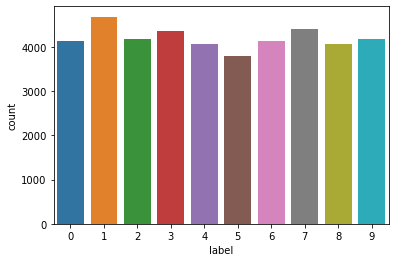

In [26]:
sns.countplot(y)

*Lets try to visualize how are these digits written*

In [27]:
df_train = df_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

Let me try to explain what above reshape means <br>
We have got ourselves a 28x28 pixel image whose pixel values are all stacked in a single row. <br>
*In order to view these 784 column values as an image we convert it into a 28x28x1 matrix , here 1 stands for number of color channels, if we had a colored picture we would have used 3* <br>
Finally the value (-1) , -1 in a reshape function means you donot have to worry about the dimension , the function will calculate it for you.
In our case -1 represents the no of rows of our dataset or no of images , if you replace -1 with 42000(no of rows of train dataset) then also it will work fine

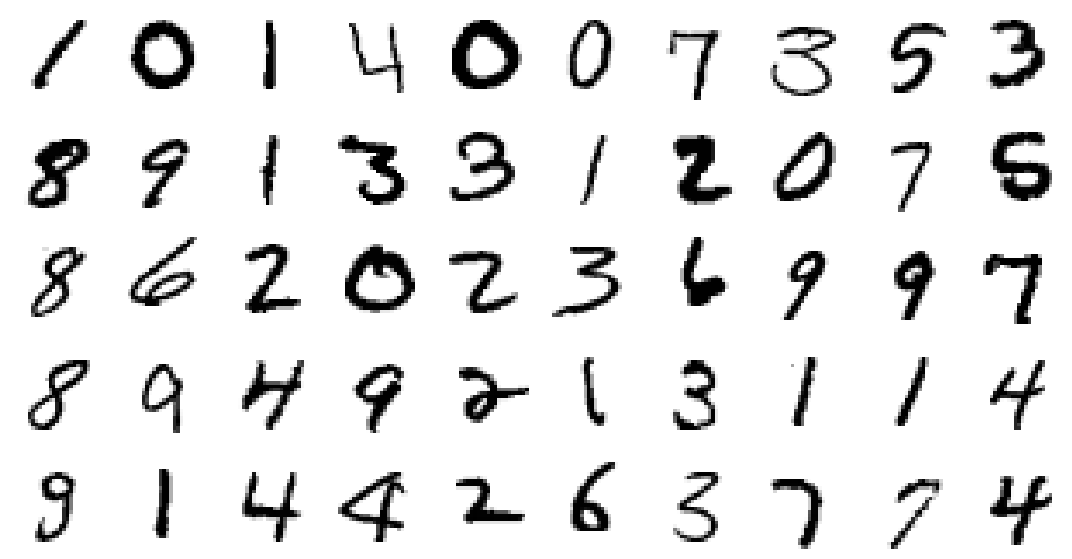

In [28]:
#Lets display first 50 images
plt.figure(figsize=(15,8))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(df_train[i].reshape((28,28)),cmap='binary')
    plt.axis("off")
plt.tight_layout()
plt.show()


# Normalize the Dataset
 - The range of pixel values is from 0-255<br>
 - In order to normalize our data and bring it all to the range of [0-1] we divide the values in dataset by 255
 

In [29]:
y = train['label']
df_train = train.drop(columns=["label"],axis=1)
print(y.shape,df_train.shape)

(42000,) (42000, 784)


In [30]:
# Normalize the dataset
df_train = df_train / 255
test = test / 255

In [31]:
# Loading 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [32]:
seed = 2
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(df_train,y, test_size = test_size , random_state = seed)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(33600, 784) (8400, 784) (33600,) (8400,)


In [33]:
#KNN
# we use n_neighbours-10 since we know our target variables are in the range of [0-9]
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: %f' % accuracy)


Accuracy: 0.961071


In [34]:
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test = test / 255

In [35]:
y_pred_test = knn.predict(test)

In [36]:
submission = pd.DataFrame({"ImageId": list(range(1, len(y_pred_test)+1)),"Label": y_pred_test})

submission.to_csv("submission_digit1.csv", index=False)